In [ ]:
https://chrisramsay.co.uk/posts/2017/03/fun-with-the-sun-and-pyephem/

In [131]:
# Import some bits
import Here
import ephem, math, datetime
x , y = Here.here()
# Get retina display quality for plots
%config InlineBackend.figure_format = 'retina'

home = ephem.Observer()
# Set up
#home.date = '2017-1-1 09:00:00'
home.lat = x
home.lon = y

home.date = '2017-10-15 09:00:00'
home.lat = '53.4975'
home.lon = '-0.3154'

In [132]:
home.elev

0.0

In [133]:
home.temp

15.0

In [134]:
home.pressure

1010.0

In [135]:
sun = ephem.Sun()
sun.compute(home)

In [136]:
rising = home.previous_rising(sun).datetime()
print('Sunrise is at {}:{}:{}'.format(rising.hour, rising.minute, rising.second))

transit = home.next_transit(sun).datetime()
print('Local noon is at {}:{}:{}'.format(transit.hour, transit.minute, transit.second))

setting = home.next_setting(sun).datetime()
print('Sunset is at {}:{}:{}'.format(setting.hour, setting.minute, setting.second))


Sunrise is at 6:28:5
Local noon is at 11:46:59
Sunset is at 17:4:58


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import ephem, math, datetime
matplotlib.style.use('ggplot')
home = ephem.Observer()
# Prepare
home.date = '2017/1/1'
sun = ephem.Sun()
times = []

def get_diff(tm):
    """Return a difference in seconds between tm and 12:00:00 on tm's date"""
    a = datetime.datetime.combine(tm, datetime.time(12, 0))
    return (a-tm).total_seconds()/60

# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    trans = home.next_transit(sun).datetime()
    times.append(get_diff(trans))

# Set up
ts = pd.Series(times, index=pd.date_range('2017/1/1', periods=len(times)))

In [138]:
ts.loc['2017-10-1':'2017-10-16']

2017-10-01     9.458774
2017-10-02     9.773101
2017-10-03    10.081948
2017-10-04    10.384920
2017-10-05    10.681617
2017-10-06    10.971636
2017-10-07    11.254577
2017-10-08    11.530047
2017-10-09    11.797667
2017-10-10    12.057076
2017-10-11    12.307934
2017-10-12    12.549924
2017-10-13    12.782750
2017-10-14    13.006140
2017-10-15    13.219841
2017-10-16    13.423616
Freq: D, dtype: float64

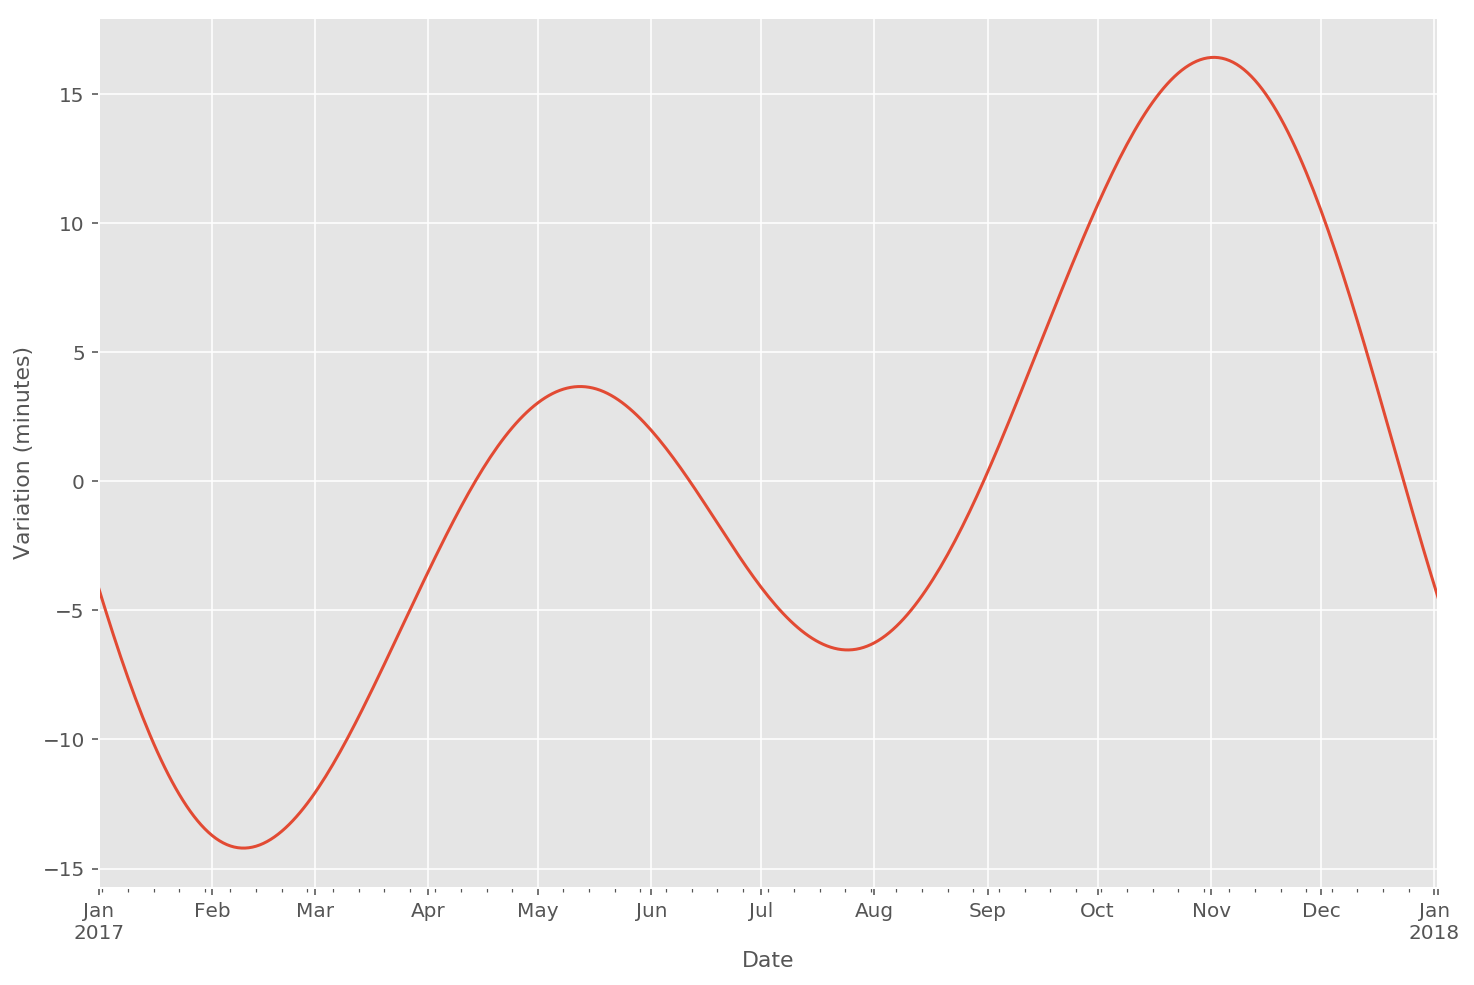

In [11]:
ax = ts.plot()
ax.set_xlabel(u'Date', fontsize=11)
ax.set_ylabel(u'Variation (minutes)', fontsize=11)
plt.rcParams["figure.figsize"] = [9, 6]
plt.show()

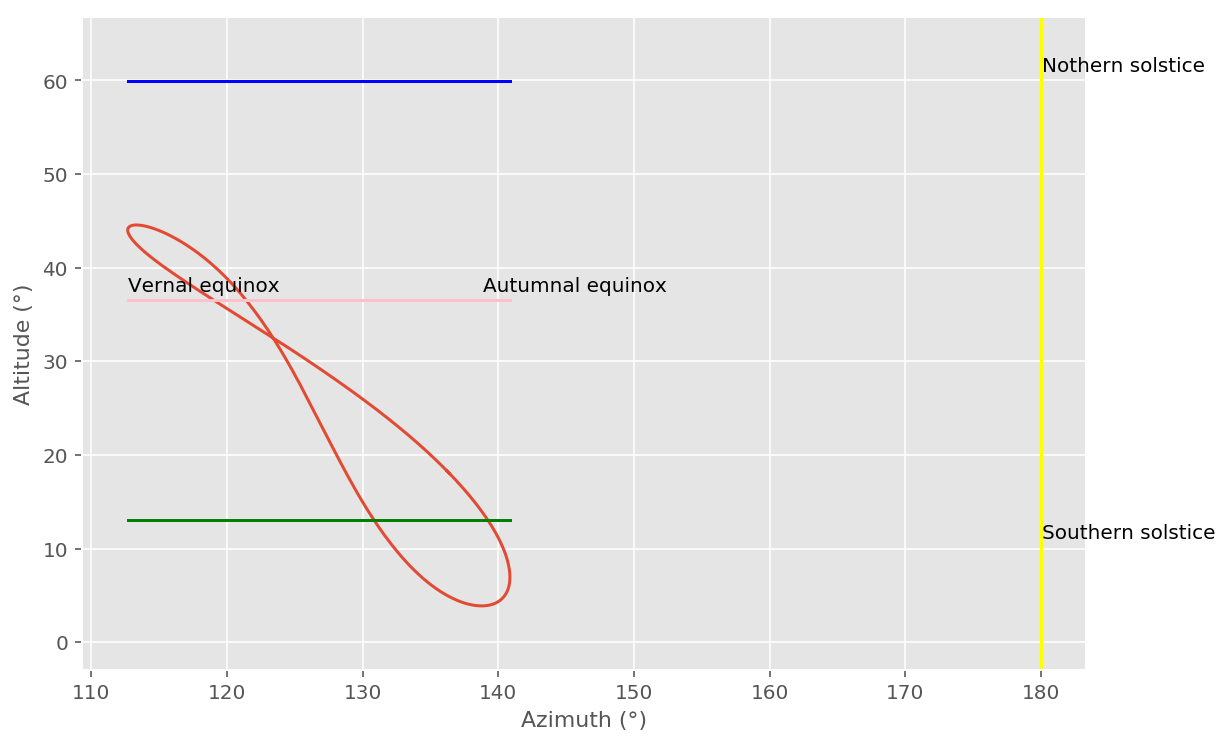

In [140]:
# Prepare
home.date = '2017/10/15 9:00:00'
sun = ephem.Sun()
posx = []
posy = []

# Solstice altitude
phi = 90 - math.degrees(home.lat)
# Earth axial tilt
epsilon = 23.439

def get_sun_az(tm):
    """Get the azimuth based on a date"""
    sun.compute(tm)
    return math.degrees(sun.az)

def get_sun_alt(tm):
    """Get the altitude based on a date"""
    sun.compute(tm)
    return math.degrees(sun.alt)

# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    trans = home.next_transit(sun).datetime()
    posx.append(get_sun_az(home))
    posy.append(get_sun_alt(home))

# Set up
fig, ax = plt.subplots()
ax.plot(posx, posy)
ax.grid(True)
ax.set_xlabel(u'Azimuth (°)', fontsize=11)
ax.set_ylabel(u'Altitude (°)', fontsize=11)
# Add some labels, lines & resize
ax.annotate('Vernal equinox', xy=(min(posx), phi + 1), xytext=(min(posx), phi + 1))
ax.annotate('Autumnal equinox', xy=(max(posx) -2, phi + 1), xytext=(max(posx) -2, phi + 1))
ax.annotate('Nothern solstice', xy=(180.1, phi + epsilon + 1), xytext=(180.1, phi + epsilon + 1))
ax.annotate('Southern solstice', xy=(180.1, phi - epsilon - 2), xytext=(180.1, phi - epsilon - 2))
plt.plot((min(posx), max(posx)), (phi + epsilon, phi + epsilon), 'blue')
plt.plot((min(posx), max(posx)), (phi, phi), 'pink')
plt.plot((min(posx), max(posx)), (phi - epsilon, phi - epsilon), 'green')
plt.axvline(180, color='yellow')
plt.rcParams["figure.figsize"] = [12, 8]
plot_margin = 4
x0, x1, y0, y1 = plt.axis()
plt.axis((x0, x1, y0 - plot_margin, y1 + plot_margin))
plt.show()

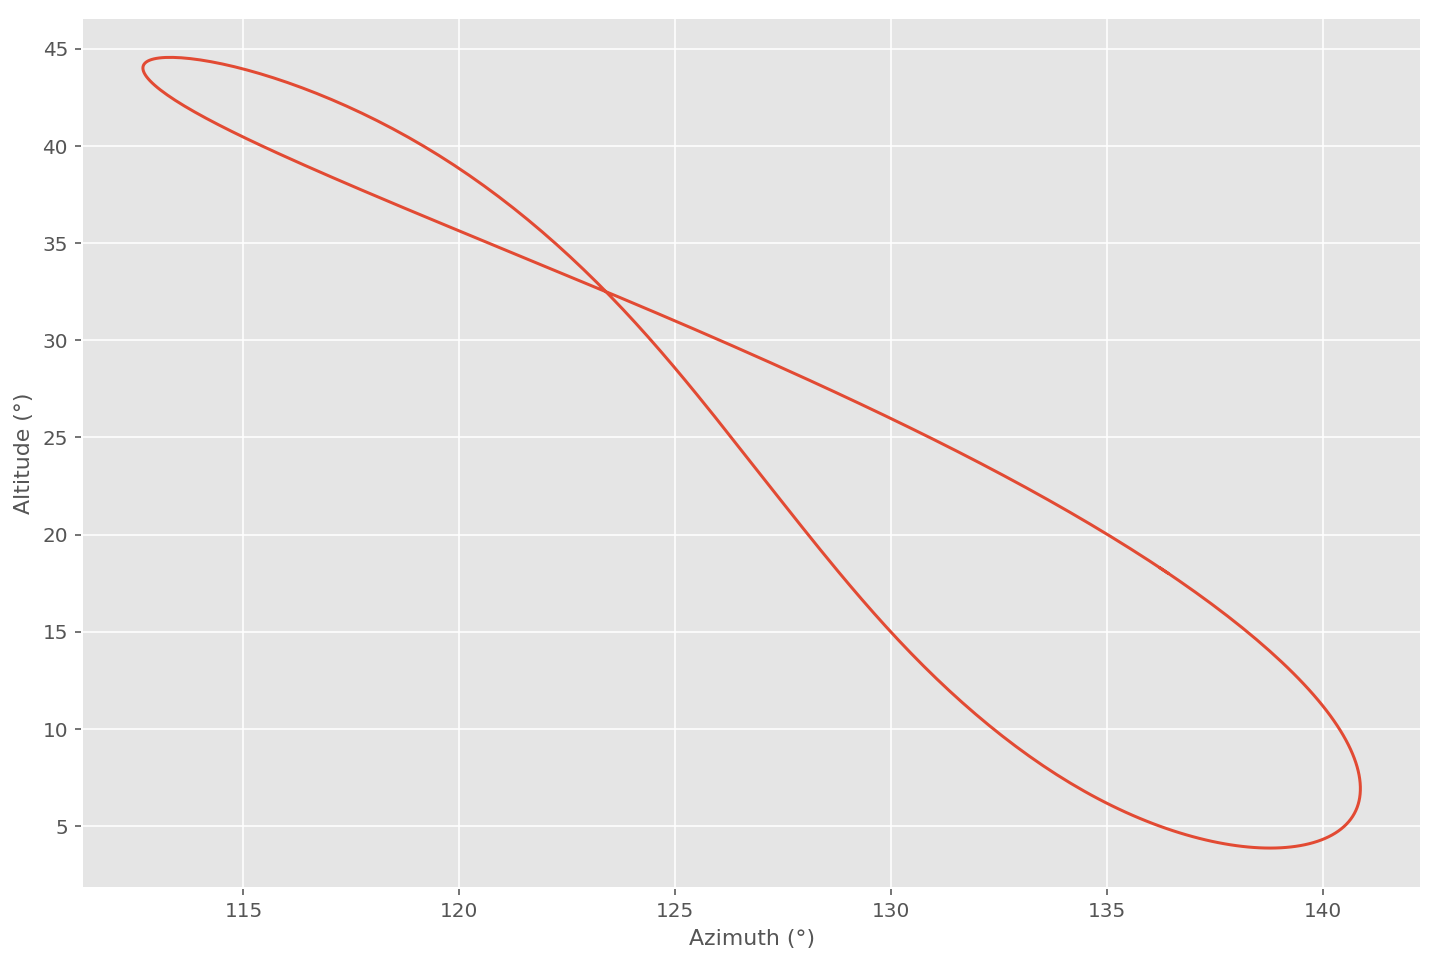

In [141]:
# Prepare
home.date = '2017/10/15 09:00:00'
home.horizon = '0'
sun = ephem.Sun()
posy = []
posx = []

def get_sun_az(tm):
    """Get the azimuth based on a date"""
    sun.compute(tm)
    return math.degrees(sun.az)

def get_sun_alt(tm):
    """Get the altitude based on a date"""
    sun.compute(tm)
    return math.degrees(sun.alt)

# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    posy.append(get_sun_alt(home))
    posx.append(get_sun_az(home))

# Set up
fig, ax = plt.subplots()
ax.plot(posx, posy)
# Add some labels & resize
ax.set_xlabel(u'Azimuth (°)', fontsize=11)
ax.set_ylabel(u'Altitude (°)', fontsize=11)
plt.rcParams["figure.figsize"] = [9, 6]
# Fire
plt.show()



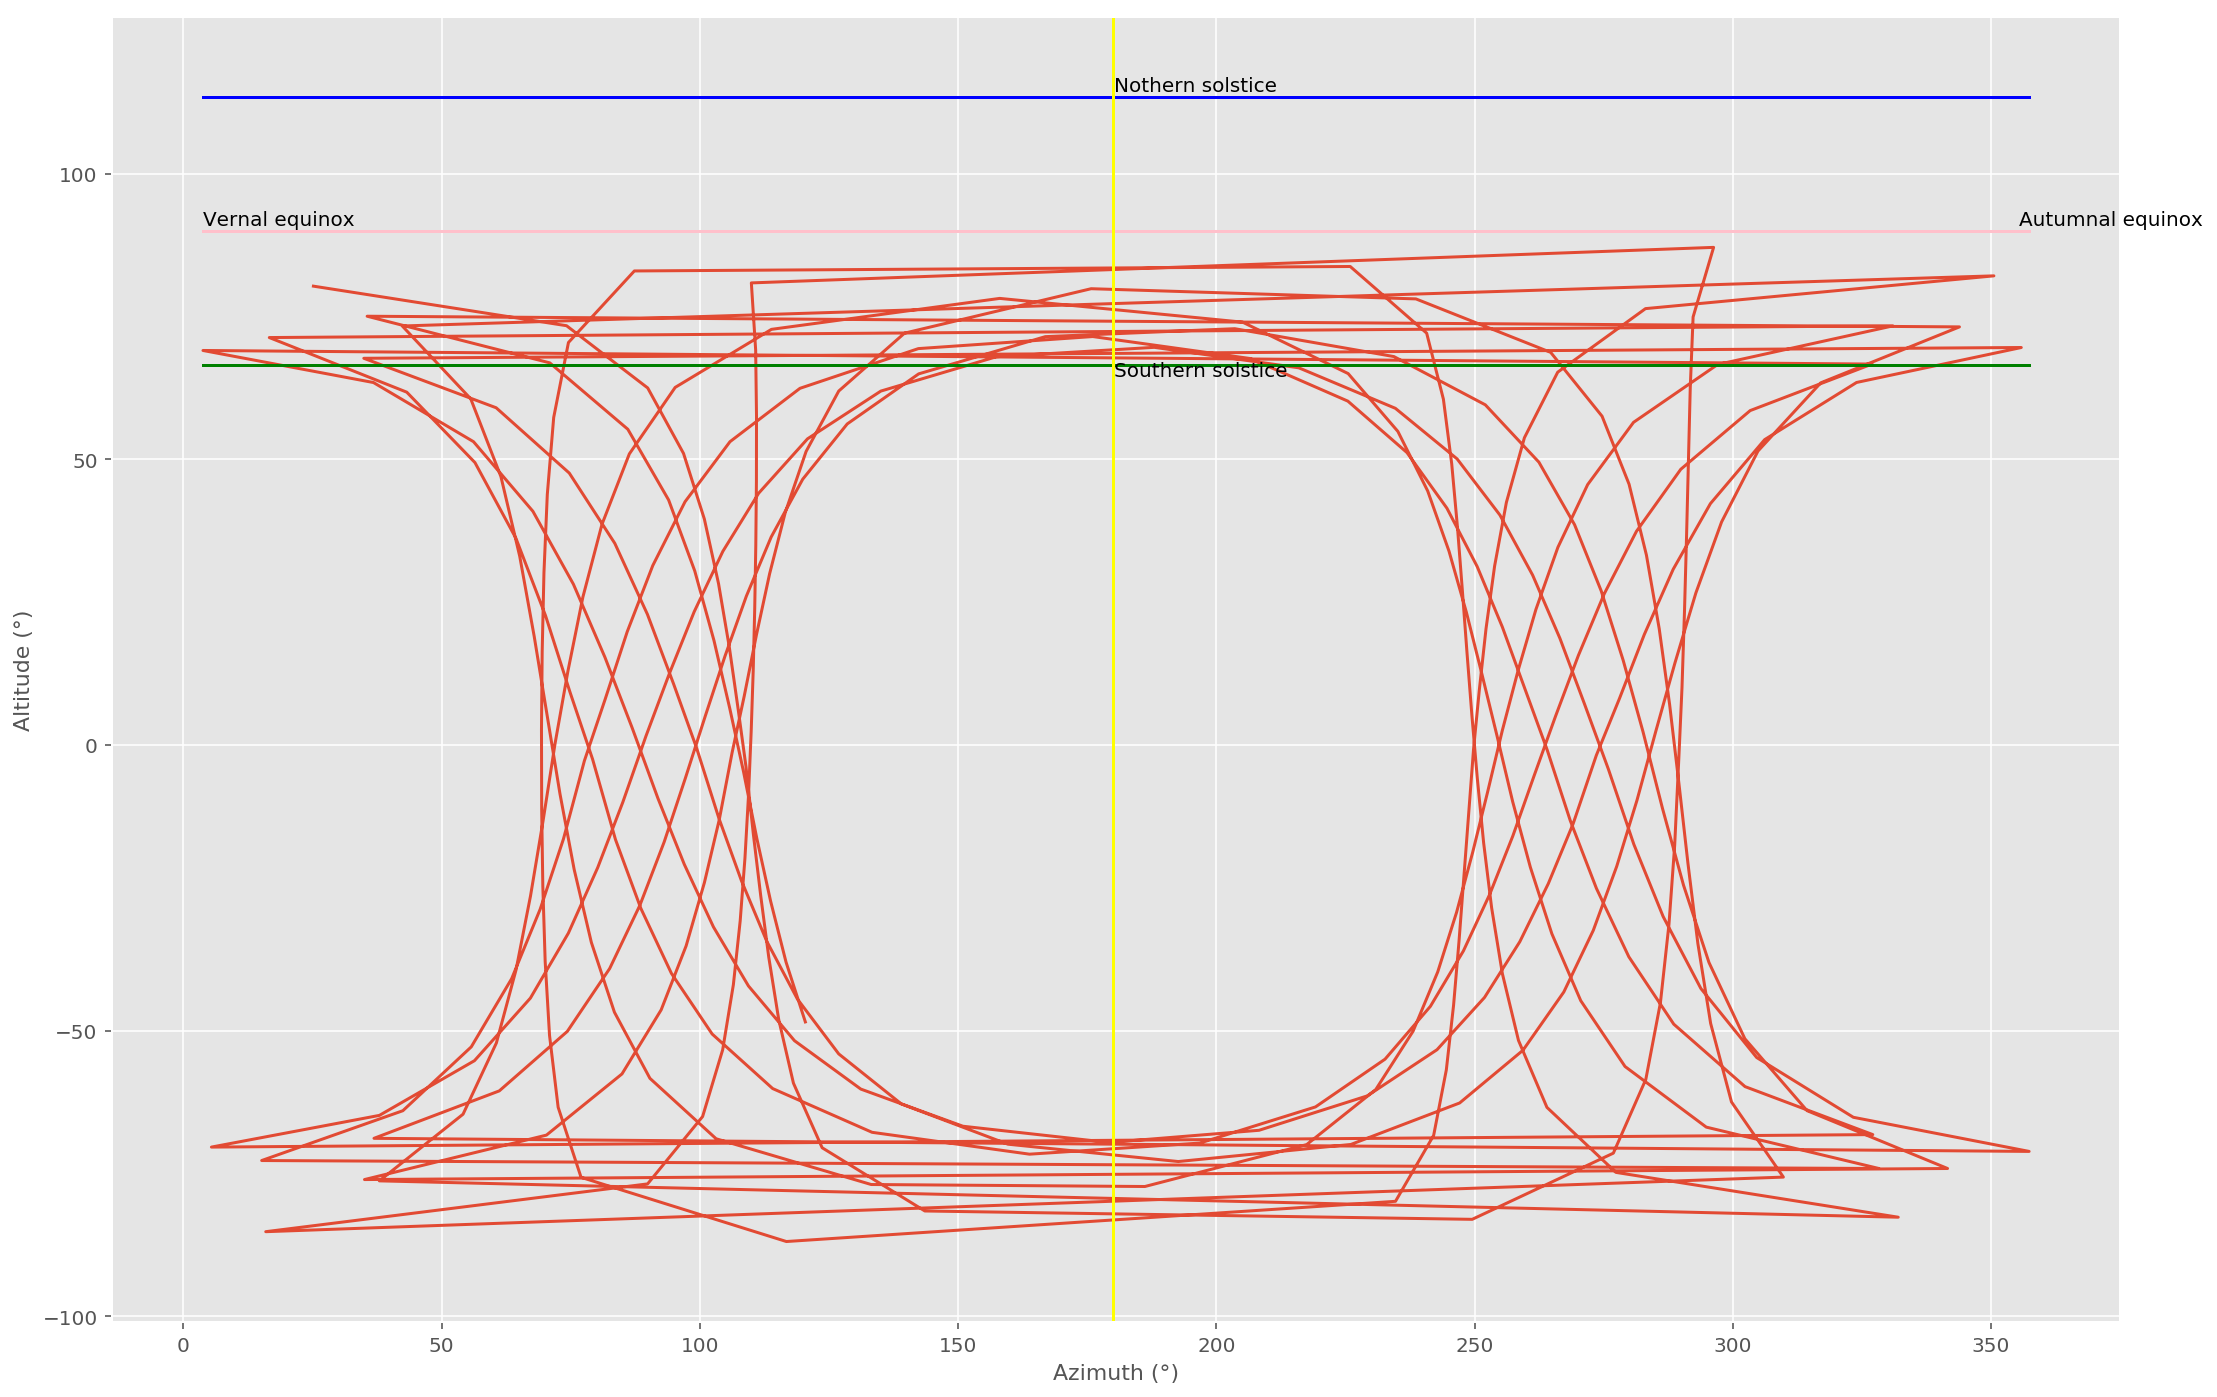

In [8]:
# Prepare
import Here
import ephem, math, datetime
x , y = Here.here()
# Get retina display quality for plots
%config InlineBackend.figure_format = 'retina'
home = ephem.Observer()
home.date = '2017/10/15 9:00:00'
moon = ephem.Moon()
posx = []
posy = []
# Solstice altitude
phi = 90 - math.degrees(home.lat)
# Earth axial tilt
epsilon = 23.439
def get_moon_az(tm):
    """Get the azimuth based on a date"""
    moon.compute(tm)
    return math.degrees(moon.az)
def get_moon_alt(tm):
    """Get the altitude based on a date"""
    moon.compute(tm)
    return math.degrees(moon.alt)
# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    trans = home.next_transit(moon).datetime()
    posx.append(get_moon_az(home))
    posy.append(get_moon_alt(home))
# Set up
fig, ax = plt.subplots()
ax.plot(posx, posy)
ax.grid(True)
ax.set_xlabel(u'Azimuth (°)', fontsize=11)
ax.set_ylabel(u'Altitude (°)', fontsize=11)
# Add some labels, lines & resize
ax.annotate('Vernal equinox', xy=(min(posx), phi + 1), xytext=(min(posx), phi + 1))
ax.annotate('Autumnal equinox', xy=(max(posx) -2, phi + 1), xytext=(max(posx) -2, phi + 1))
ax.annotate('Nothern solstice', xy=(180.1, phi + epsilon + 1), xytext=(180.1, phi + epsilon + 1))
ax.annotate('Southern solstice', xy=(180.1, phi - epsilon - 2), xytext=(180.1, phi - epsilon - 2))
plt.plot((min(posx), max(posx)), (phi + epsilon, phi + epsilon), 'blue')
plt.plot((min(posx), max(posx)), (phi, phi), 'pink')
plt.plot((min(posx), max(posx)), (phi - epsilon, phi - epsilon), 'green')
plt.axvline(180, color='yellow')
plot_margin = 4
x0, x1, y0, y1 = plt.axis()
plt.axis((x0, x1, y0 - plot_margin, y1 + plot_margin))
plt.rcParams["figure.figsize"] = [18, 12]
plt.show()

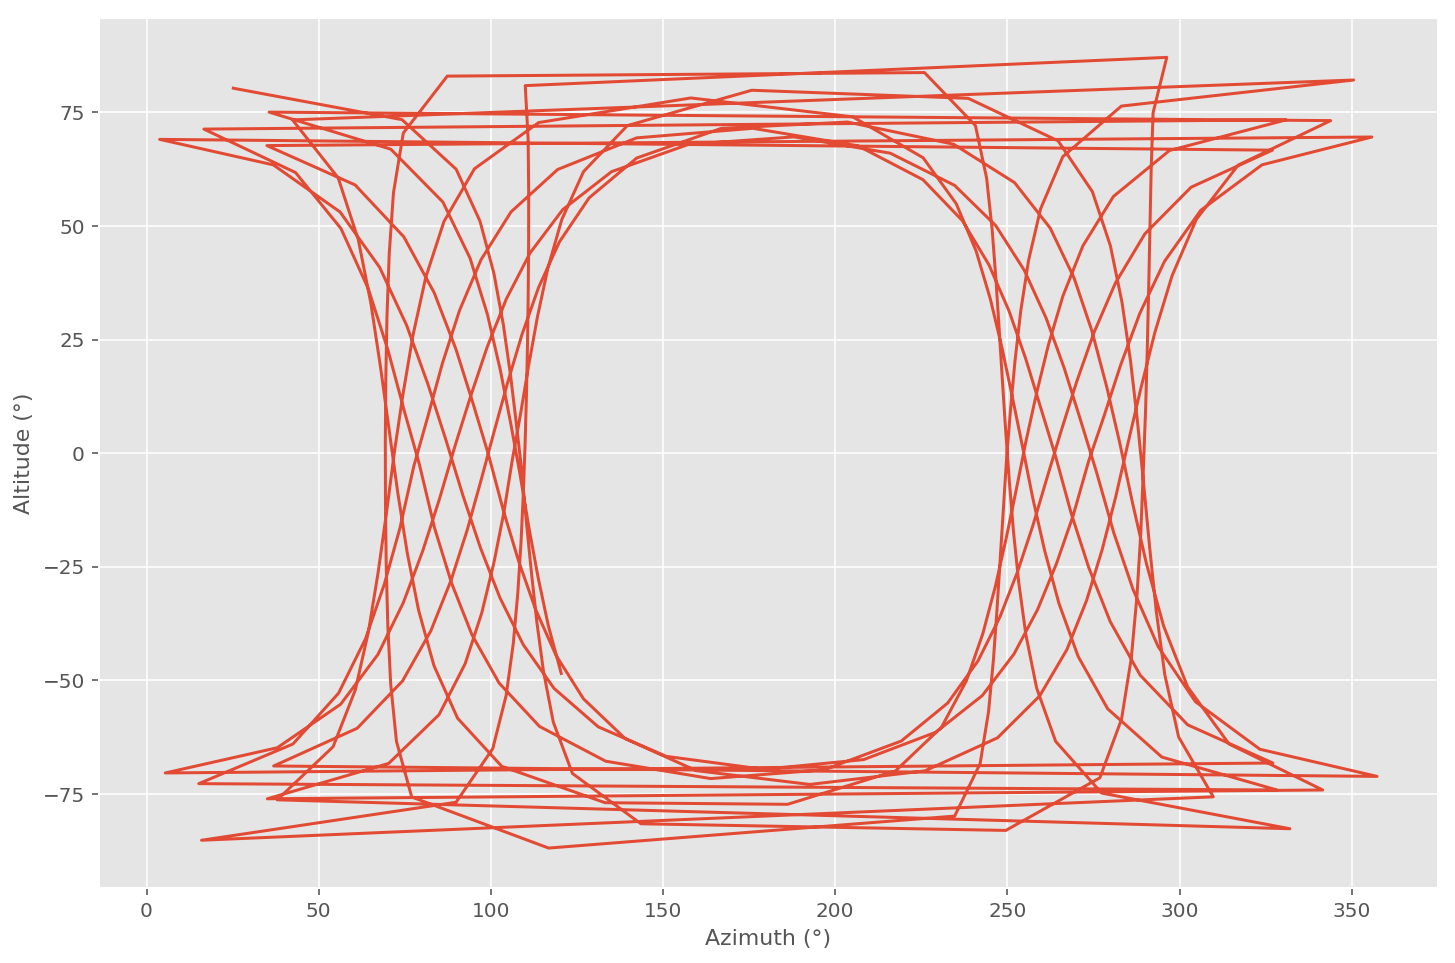

In [4]:
# Prepare
home.date = '2017/10/15 09:00:00'
home.horizon = '0'
moon = ephem.Moon()
posy = []
posx = []
def get_moon_az(tm):
    """Get the azimuth based on a date"""
    moon.compute(tm)
    return math.degrees(moon.az)
def get_moon_alt(tm):
    """Get the altitude based on a date"""
    moon.compute(tm)
    return math.degrees(moon.alt)
# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    posy.append(get_moon_alt(home))
    posx.append(get_moon_az(home))
# Set up
fig, ax = plt.subplots()
ax.plot(posx, posy)
# Add some labels & resize
ax.set_xlabel(u'Azimuth (°)', fontsize=11)
ax.set_ylabel(u'Altitude (°)', fontsize=11)
plt.rcParams["figure.figsize"] = [9, 6]
plt.show()

In [142]:
initial_set = home.next_setting(sun).datetime() # zero edge
next_set = home.next_setting(sun, use_center=True).datetime() # zero centre

print('Centre sunset is at {}:{}:{}'.format(next_set.hour, next_set.minute, next_set.second))
print('Edge sunset is at {}:{}:{}'.format(initial_set.hour, initial_set.minute, initial_set.second))

delta = initial_set - next_set
print('Time difference is {} mins, {} secs'.format(delta.seconds/60, delta.seconds%60))


Centre sunset is at 16:58:42
Edge sunset is at 17:0:59
Time difference is 2 mins, 17 secs


In [ ]:
http://www.tle.info/data/visual.txt

In [143]:
def get_setting_twilights(obs, body):
    """Returns a list of twilight datetimes in epoch format"""
    results = []
    # Twilights, their horizons and whether to use the centre of the Sun or not
    twilights = [('0', False), ('-6', True), ('-12', True), ('-18', True)]
    for twi in twilights:
        # Zero the horizon
        obs.horizon = twi[0]
        try:
            # Get the setting time and date
            now = obs.next_setting(body, use_center=twi[1]).datetime()
            # Get seconds elapsed since midnight
            results.append(
                (now - now.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
            )
        except ephem.AlwaysUpError:
            # There will be occasions where the sun stays up, make that max seconds
            results.append(86400.0)
    return results

home.horizon = '0'
twilights = get_setting_twilights(home, sun)
twilights

[61259.785153, 63420.322062, 65784.646804, 68211.108572]

In [144]:
# Prepare
home.date = '2017/10/15 9:00:00'
home.horizon = '0'
sun = ephem.Sun()
twidataset = []

# Calculate just over a year of data
for i in range(1, 368):
    home.date += ephem.Date(1)
    twidataset.append(get_setting_twilights(home, sun))

In [145]:
twidataset[150:160]

[[65132.465977, 67258.884648, 69655.800601, 72203.899541],
 [65243.873827, 67371.121714, 69772.853547, 72331.625596],
 [65355.096842, 67483.466225, 69890.394016, 72460.403665],
 [65466.141034, 67595.925083, 70008.434354, 72590.264767],
 [65577.012125, 67708.505916, 70126.98898, 72721.241221],
 [65687.715968, 67821.215606, 70246.071139, 72853.365378],
 [65798.258259, 67934.061597, 70365.694885, 72986.670843],
 [65908.645166, 68047.051292, 70485.874181, 73121.193725],
 [66018.883376, 68160.193203, 70606.624423, 73256.970509],
 [66128.980482, 68273.49631, 70727.962015, 73394.042858]]

In [146]:
df = pd.DataFrame(twidataset, columns=['Sunset', 'Civil', 'Nautical', 'Astronomical'])

In [147]:
df[275:375]

,Sunset,Civil,Nautical,Astronomical
275,73162.508757,76087.276582,80344.766648,86400.000000
276,73085.665953,75991.293126,80188.561495,86400.000000
277,73006.196386,75892.590553,80030.829591,86400.000000
278,72924.160195,75791.263354,79871.701727,86400.000000
279,72839.618445,75687.404763,79711.297528,86400.000000
280,72752.632797,75581.106874,79549.727601,86400.000000
281,72663.265037,75472.460278,79387.092981,86400.000000
282,72571.576678,75361.553097,79223.487256,86400.000000
283,72477.628877,75248.472106,79058.997296,86400.000000
284,72381.482139,75133.300930,78893.702060,86400.000000


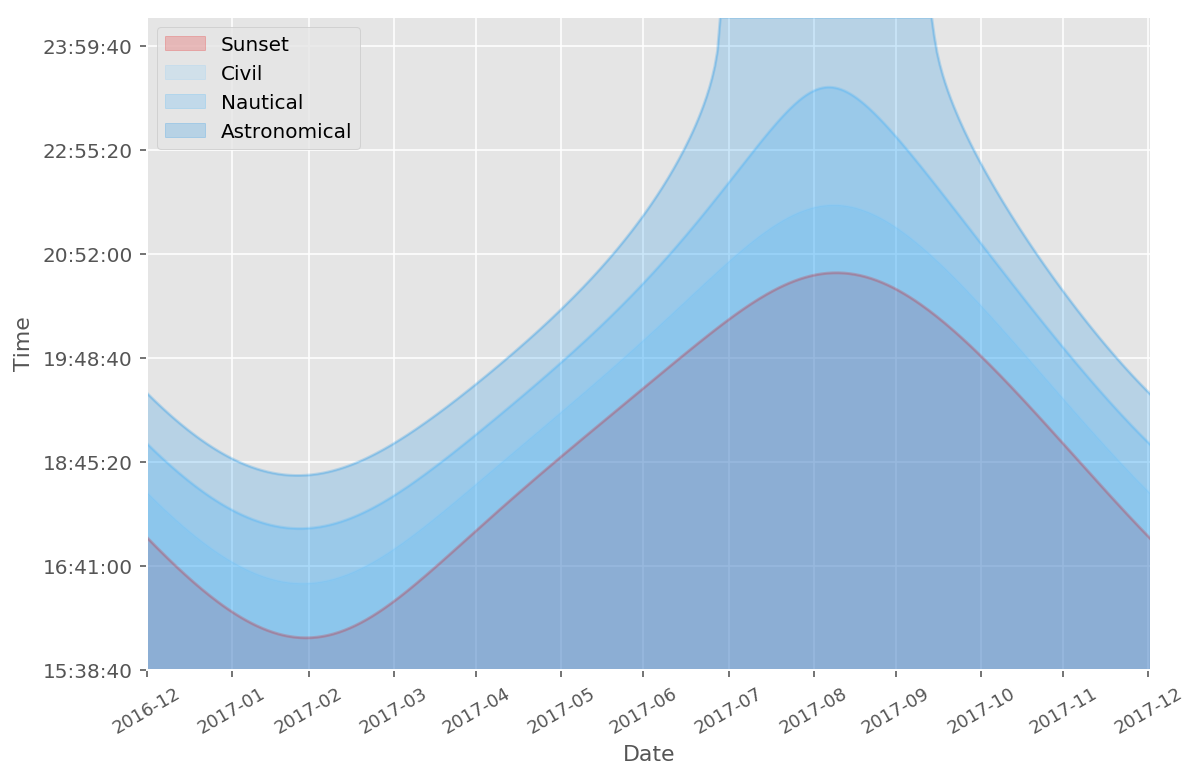

In [148]:
from matplotlib.ticker import FuncFormatter
import numpy as np

def timeformatter(x, pos):
    """The two args are the value and tick position"""
    return '{}:{}:{:02d}'.format(int(x/3600), int(x/24/60), int(x%60))

def dateformatter(x, pos):
    """The two args are the value and tick position"""
    dto = datetime.date.fromordinal(datetime.date(2017, 1, 1).toordinal() + int(x) - 1)
    return '{}-{:02d}'.format(dto.year, dto.month)

plt.rcParams["figure.figsize"] = [9, 6]
ax = df.plot.area(stacked=False, color=['#e60000', '#80ccff', '#33adff', '#008ae6'], alpha=0.2)
# Sort out x-axis
# Demarcate months
dim = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ax.xaxis.set_ticks(np.cumsum(dim))
ax.xaxis.set_major_formatter(FuncFormatter(dateformatter))
ax.set_xlabel(u'Date', fontsize=11)
# Sort out y-axis
ax.yaxis.set_major_formatter(FuncFormatter(timeformatter))
ax.set_ylim([55000, 86400])
ax.set_ylabel(u'Time', fontsize=11)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=9)
# Done
plt.show()


In [149]:
df.loc[df['Sunset'] == 86400.0].head(1)

,Sunset,Civil,Nautical,Astronomical


In [150]:
df.loc[df['Astronomical'] == 86400.0].tail(1)

,Sunset,Civil,Nautical,Astronomical
286,72182.830841,74897.013762,78560.98289,86400.0


In [151]:
# Prepare
home.date = '2017/10/15 9:00:00'
home.horizon = '0'
sun = ephem.Sun()


In [152]:
s_start = home.next_setting(sun, use_center=False).datetime()
s_start


datetime.datetime(2017, 10, 15, 17, 4, 58, 991516)

In [153]:
home.horizon = '-0.53'
s_end = home.next_setting(sun, use_center=False).datetime()
s_end


datetime.datetime(2017, 10, 15, 17, 9, 41, 854061)

In [154]:
delta = s_end - s_start
delta.total_seconds()

282.862545

In [155]:
home.date = '2017/10/15 9:00:00'
settings = []
sun = ephem.Sun()
for i in range(1, 368):
    home.date += ephem.Date(1)
    home.horizon = '0'
    start = home.next_setting(sun, use_center=False).datetime()
    #width of the Sun in Degrees
    home.horizon = '-0.53'
    end = home.next_setting(sun, use_center=False).datetime()
    settings.append((end - start).total_seconds())
    
ts = pd.Series(settings, index=pd.date_range('2017/10/1', periods=len(settings)))

In [156]:
ts[0:12]

2017-10-01    283.608952
2017-10-02    284.390157
2017-10-03    285.205966
2017-10-04    286.056146
2017-10-05    286.940493
2017-10-06    287.858703
2017-10-07    288.810508
2017-10-08    289.795598
2017-10-09    290.813574
2017-10-10    291.864019
2017-10-11    292.946518
2017-10-12    294.060574
Freq: D, dtype: float64

In [157]:
ts.max(), ts.min()

(384.86780299999998, 275.37187999999998)

In [158]:
ts.max() - ts.min()

109.495923

# Sunrise Length in Seconds

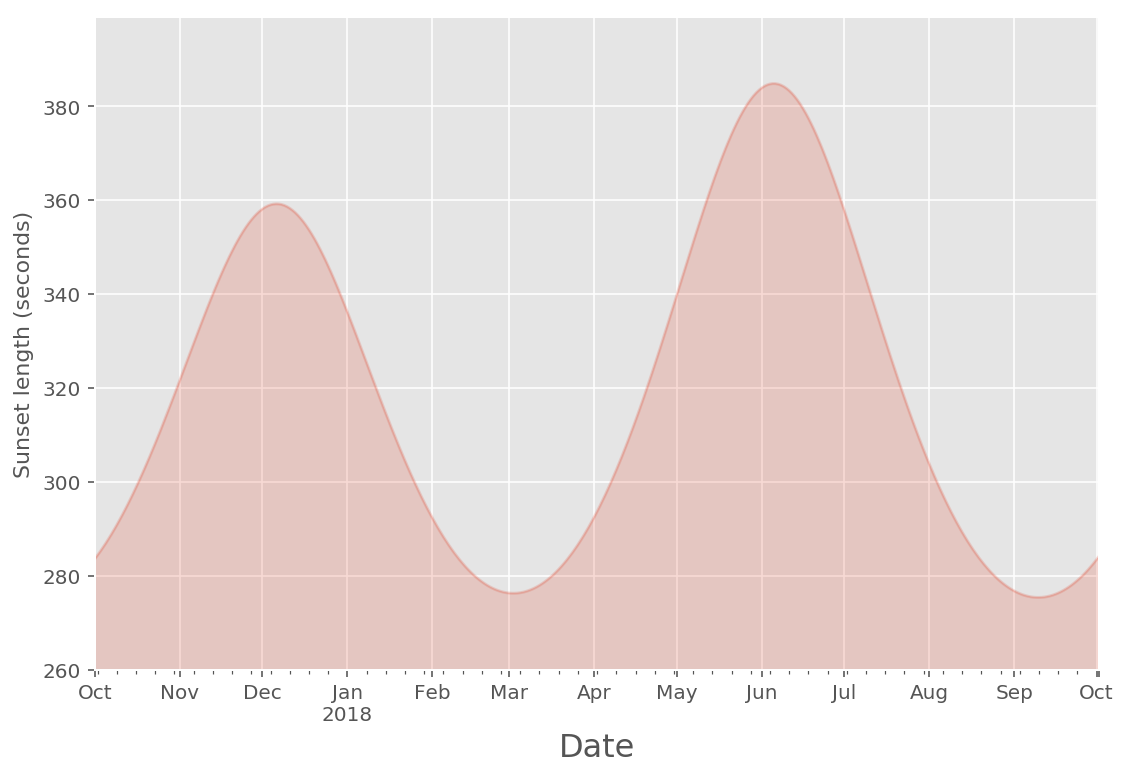

In [159]:
ax = ts.plot.area(alpha=0.2)
plt.rcParams["figure.figsize"] = [9, 6]
ax.set_xlabel(u'Date', fontsize=16)
ax.set_ylabel(u'Sunset length (seconds)', fontsize=11)
ax.set_ylim([math.floor(ts.min()) - 15, math.floor(ts.max()) + 15])
# Show Plot
plt.show()

# Moon-Rise and Moon-Sets

<b>This Moon as viewed from earth has different visible diameters <br />
due to the variation in nearness to the Earth: <br />
The nearest is ( Perigee = .33.66 Degrees )<br />
The farthest is ( Apogee = .29.94 Degrees )  
The Average size is 31.8 Degrees.
</b>


In [74]:
Apogee = 29.94;Perigee = 33.66
Av = (Apogee+Perigee)/2
print Av

31.8


In [75]:
home.date = '2017/10/15 9:00:00'
settings = []
moon = ephem.Moon()
for i in range(1, 368):
    home.date += ephem.Date(1)
    home.horizon = '0'
    start = home.next_setting(moon, use_center=False).datetime()
    #Using the largest (perigee) width of the Moon in Degrees
    home.horizon = '-0.33.66'
    end = home.next_setting(moon, use_center=False).datetime()
    settings.append((end - start).total_seconds())
    
ts = pd.Series(settings, index=pd.date_range('2017/10/1', periods=len(settings)))

In [90]:
print "Longest  Moonset in seconds  : ",ts.max(),"\n",\
"Shortest Moonset in seconds : ",ts.min(),"\n",\
"Longest to the Shortest : ",ts.max() - ts.min()

Longest  Moonset in seconds  :  229.498932 
Shortest Moonset in seconds :  177.685532 
Longest to the Shortest :  51.8134


In [76]:
ts[0:12]

2017-10-01    182.605484
2017-10-02    178.654073
2017-10-03    177.890603
2017-10-04    180.175848
2017-10-05    185.210523
2017-10-06    192.468001
2017-10-07    201.044198
2017-10-08    209.521257
2017-10-09    216.050703
2017-10-10    218.878013
2017-10-11    217.185672
2017-10-12    211.594586
Freq: D, dtype: float64

In [78]:
ts.max() - ts.min()

51.813400000000001

## Graph Showing the MoonSet 
## Start top Finish variation times over a year.

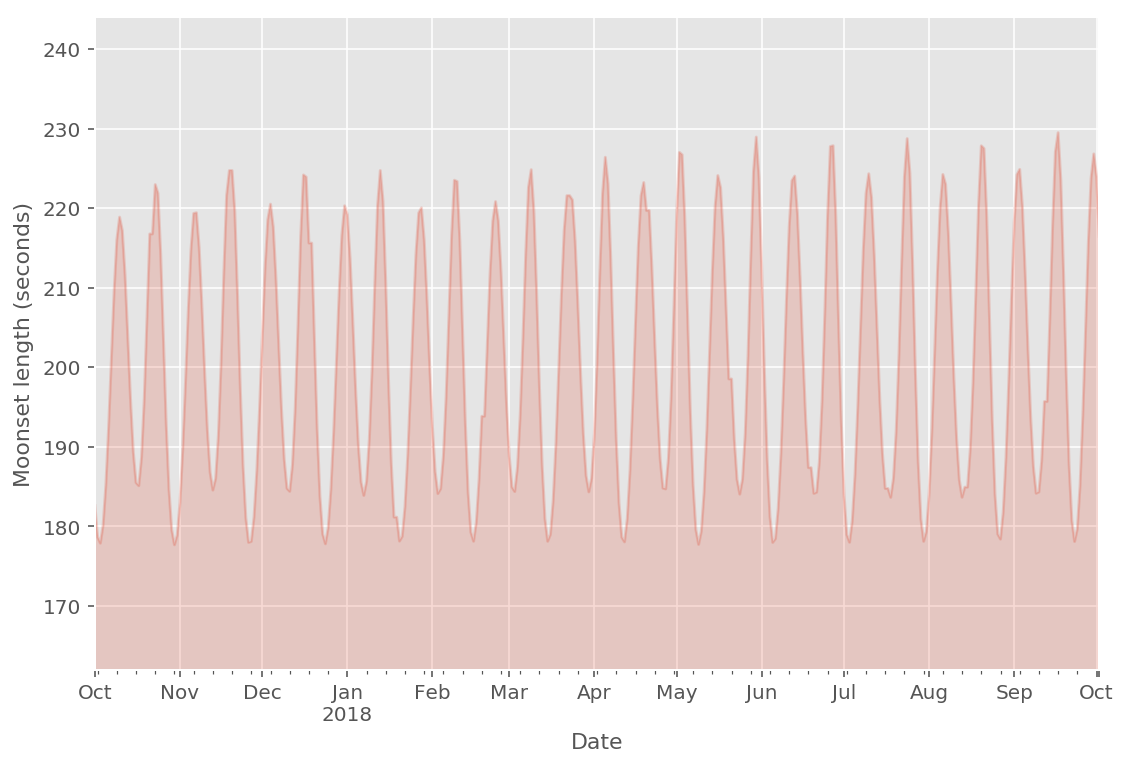

In [80]:
ax = ts.plot.area(alpha=0.2)
plt.rcParams["figure.figsize"] = [9, 6]
ax.set_xlabel(u'Date', fontsize=11)
ax.set_ylabel(u'Moonset length (seconds)', fontsize=11)
ax.set_ylim([math.floor(ts.min()) - 15, math.floor(ts.max()) + 15])
# Show Plot
plt.show()

In [94]:
import Here
Here.here()

('14.797424', '121.057481')

In [118]:
!mkdir mathbooks

In [135]:
import grab_pdfs
base_url='https://gist.githubusercontent.com/raylee/bd6c59d4fcd30baa5f77/raw/c20ec05dc4669b93f16d0b5c5824615dea42a956/springer-free-maths-books.md'
grab_pdfs.get_page(base_url)
get_all_links(html)

NameError: name 'get_all_links' is not defined

In [2]:
import os
import urllib

DOWNLOADS_DIR = 'mathbooks/'

# For every line in the file
for url in open('maths-booksnb.txt'):
    # Split on the rightmost / and take everything on the right side of that
    name = url.rsplit('', 1)[-1]

    # Combine the name and the downloads directory to get the local filename
    filename = os.path.join(DOWNLOADS_DIR, name)

    # Download the file if it does not exist
    if not os.path.isfile(filename):
        urllib.urlretrieve(url, filename)

KeyboardInterrupt: 

In [67]:
import os
import urllib

DOWNLOADS_DIR = 'mathbooks/'

# For every line in the file
for url in open('maths-booksnb.txt'):
    # Split on the rightmost / and take everything on the right side of that
    name = url.rsplit('/', 1)[-1]

    # Combine the name and the downloads directory to get the local filename
    filename = os.path.join(DOWNLOADS_DIR, name)

    # Download the file if it does not exist
    if not os.path.isfile(filename):
        urllib.urlretrieve(url, filename)

AttributeError: 'list' object has no attribute 'startswith'

In [3]:
import requests


links = ['https://www.fizyka.umk.pl/wfaiis/files/06_PyEphem.pdf']
for link in links:
    book_name = link.split('/')[-1]
    with open('PyEphem_swedish.pdf', 'wb') as book:
        a = requests.get(link, stream=True)

        for block in a.iter_content(512):
            if not block:
                break

            book.write(block)

In [77]:
!wget -O book.pdf http://link.springer.com/content/pdf/10.1007/978-1-4684-9936-0.pdf

--2017-10-15 17:19:50--  http://link.springer.com/content/pdf/10.1007/978-1-4684-9936-0.pdf
Resolving link.springer.com (link.springer.com)... 151.101.52.95
Connecting to link.springer.com (link.springer.com)|151.101.52.95|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://link.springer.com/content/pdf/10.1007/978-1-4684-9936-0.pdf [following]
--2017-10-15 17:19:50--  https://link.springer.com/content/pdf/10.1007/978-1-4684-9936-0.pdf
Connecting to link.springer.com (link.springer.com)|151.101.52.95|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://link.springer.com/book/10.1007/978-1-4684-9936-0?no-access=true [following]
--2017-10-15 17:19:51--  https://link.springer.com/book/10.1007/978-1-4684-9936-0?no-access=true
Reusing existing connection to link.springer.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘book.pdf’

book.pdf                [  <=>  

In [74]:
from os import path
from urllib import urlretrieve
from urlparse import urlparse

src_url = 'http://link.springer.com/content/pdf/10.1007/978-1-4684-9936-0.pdf'
tgt_path = 'mathbooks/978-1-4684-9936-0.pdf'
urlretrieve(src_url, tgt_path)

('mathbooks/978-1-4684-9936-0.pdf',
 <httplib.HTTPMessage instance at 0x7f6f4408f098>)

In [68]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("url", help="The base page where to search for PDF files.")
parser.add_argument("path", help="Where to save the files")
parser.add_argument("--create-directory", "-p", action="store_true", help="Create the directory if it does not exist")
locals().update(vars(parser.parse_args()))
if not os.path.isdir(path):
    if create_directory:
        os.makedirs(path)
    else:
        raise OSError("Directory {} does not exist. Use the '-p' flag to create it".format(path))

usage: __main__.py [-h] [--create-directory] url path
__main__.py: error: too few arguments


SystemExit: 2

/home/jack/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import os
import urllib

DOWNLOADS_DIR = '/python-downloader/downloaded'

# For every line in the file
for url in open('urls.txt'):
    # Split on the rightmost / and take everything on the right side of that
    name = url.rsplit('/', 1)[-1]

    # Combine the name and the downloads directory to get the local filename
    filename = os.path.join(DOWNLOADS_DIR, name)

    # Download the file if it does not exist
    if not os.path.isfile(filename):
        urllib.urlretrieve(url, filename)

In [ ]:
from os import path
from urllib import urlretrieve
from urlparse import urlparse

src_url = 'http://path/to/document.pdf'
tgt_path = path.split(urlparse(src_url).path)[-1]
urlretrieve(src_url, tgt_path)

# Download PDFs

In [160]:
import requests


links = ['https://www.ics.uci.edu/%7Egopi/CS211B/opengl_programming_guide_8th_edition.pdf']
for link in links:
    book_name = link.split('/')[-1]
    with open(book_name, 'wb') as book:
        a = requests.get(link, stream=True)

        for block in a.iter_content(512):
            if not block:
                break

            book.write(block)

In [ ]:
from pattern.web import URL

url = URL('http://query.nytimes.com/mem/archive-free/pdf?res=9A00EEDE1431E13BBC4850DFBF66838A649FDE')
f = open('nytimes.pdf', 'wb')
f.write(url.download(cached=False))
f.close()

import textwrap
filename = 'springer-free-maths-booksnb.md'
idta = 'springer-free-maths-booksnb2.txt'
#ta_to = ta_from.copyta(status=endstatus)
with open(filename,'r') as infile:
    with open(idta,'wb') as tofile:
        for line in infile.readlines():
            line = line.split('\n')[-2:]
            line = str(line)
            line = line.replace("['","");line = line.replace("', '']","\n")
            tofile.write(line)
            print line

In [170]:
import grab_pdfs
import sys
from requests import get
from urlparse import urljoin
from os import path, getcwd
from bs4 import BeautifulSoup as soup
from sys import argv
base_url='http://jacknorthrup.com/PDF.html'
grab_pdfs.get_page(base_url)

base_dir = "/home/jack/Desktop/text_stuff/mathbooks"
grab_pdfs.get_pdf(base_url, base_dir)
get_page('http://jacknorthrup.com/PDF.html')
get_pdf(base_url, base_dir)
#!python grab_pdfs.py base_url, base_dir

TypeError: get_page() takes exactly 1 argument (0 given)

In [171]:
%tb

TypeError: get_page() takes exactly 1 argument (0 given)

In [173]:
def get_pdf(base_url, base_dir):
    html= get_page()
    links= get_all_links(html)
    if len(links)==0:
        raise Exception('No links found on the webpage')
    n_pdfs= 0
    for link in links:
        if link['href'][-4:]=='.pdf':
            n_pdfs+= 1
            content= get(urljoin(base_url, link['href']))
            if content.status==200 and content.headers['content-type']=='application/pdf':
                with open(path.join(base_dir, link.text+'.pdf'), 'wb') as pdf:
                    pdf.write(content.content)
    if n_pdfs==0:
        raise Exception('No pdfs found on the page')
    print "{0} pdfs downloaded and saved in {1}".format(n_pdfs, base_dir)

    
base_dir = "/home/jack/Desktop/text_stuff/mathbooks"
base_url='http://jacknorthrup.com/PDF.html'
html = 'http://jacknorthrup.com/PDF.html'
get_pdf(base_url, base_dir)    

TypeError: get_page() takes exactly 1 argument (0 given)

In [192]:
import requests
try:
    import urllib2
    from bs4 import BeautifulSoup
    from time import sleep
    import os
    import sys
    from time import sleep
except ImportError:
    print "ImportError !"
url = 'http://jacknorthrup.com/PDFshort.html'
path = "mathbooks/"


headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36'}
request = urllib2.Request(url,None,headers)
html = urllib2.urlopen(request)
soup = BeautifulSoup(html.read(), "html.parser")
soup.prettify()
#modifying the url for concatonation with 
url =  url.split('/') 
del url[-1]
url.append('')
url = '/'.join(url)
urls = []
names = []
for anchor in soup.findAll('a', href=True): #Going inside links
    req = urllib2.Request(anchor['href'],None,headers)
    pag = urllib2.urlopen(req)
    pgf = pag.read()
    soup1 = BeautifulSoup(pgf, "html.parser")
    for i, link in enumerate(soup1.findAll('a')): # Download all pdf inside each link
        fullurl = url + str(link.get('href'))
        print fullurl


KeyboardInterrupt: 

In [176]:
import requests
try:
    import urllib2
    from bs4 import BeautifulSoup
    from time import sleep
    import os
    import sys
    from time import sleep
except ImportError:
    print "ImportError !"
url = 'http://jacknorthrup.com/PDF.html'
path = "mathbooks/"


headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36'}
request = urllib2.Request(url,None,headers)
html = urllib2.urlopen(request)
soup = BeautifulSoup(html.read(), "html.parser")
soup.prettify()
#modifying the url for concatonation with 
url =  url.split('/') 
del url[-1]
url.append('')
url = '/'.join(url)
urls = []
names = []
for anchor in soup.findAll('a', href=True): #Going inside links
    req = urllib2.Request(anchor['href'],None,headers)
    pag = urllib2.urlopen(req)
    pgf = pag.read()
    soup1 = BeautifulSoup(pgf, "html.parser")
    for i, link in enumerate(soup1.findAll('a')): # Download all pdf inside each link
        fullurl = url + str(link.get('href'))
        #print fullurl

        if fullurl.endswith('.pdf'):
            #print fullurl
            urls.append(fullurl)
            names.append(soup1.select('a')[i].attrs['href'])

names_urls = zip(names, urls)
os.chdir(path)

for name, url1 in names_urls:
    try:
        if os.path.isfile(name):
            print name, "Already exists skipping..."
            pass
        else:
            links = [name]
            for link in links:
                book_name = link.split('/')[-1]
                with open(book_name, 'wb') as book:
                    a = requests.get(link, stream=True)

                    for block in a.iter_content(512):
                        if not block:
                            break

                        book.write(block)            

                        print name, "Downloaded"
    except:
        print name, "Failed to download"
        pass
    sleep(1)

KeyboardInterrupt: 

In [114]:
import urllib
from urllib import urlretrieve
from time import sleep
import textract

with open("PDF.list") as pdfs:
    link_list = pdfs.readlines()
    for link in link_list:
        urlretrieve(link)
        
        # Open A PDF and Save as TEXT file
        # keywords read pdf as text , save pdf as text
        # pdf2txt , textract
        lines = textract.process(link)
        Tfile = open(link+".txt","a")
        Tfile.closed
        for line in lines.split("."):
            #line = line.replace(".",".\n")
            line = line.replace("	"," ")
            Tfile = open(link+".txt","a")
            Tfile.write(line)
            #print line
            Tfile.close()
            print link," :converted"

        

MissingFileError: The file "https://www.ics.uci.edu/%7Egopi/CS211B/opengl_programming_guide_8th_edition.pdf
" can not be found.
Is this the right path/to/file/you/want/to/extract.pdf
?

In [106]:
from time import sleep
# modules we're using (you'll need to download lxml)
import lxml.html, urllib2, urlparse
import sys
import urllib
from urllib import urlretrieve
# the url of the page you want to scrape
base_url = 'https://github.com/EbookFoundation/free-programming-books/blob/master/free-programming-books.md#python'

# fetch the page
res = urllib2.urlopen(base_url)

# parse the response into an xml tree
tree = lxml.html.fromstring(res.read())

# construct a namespace dictionary to pass to the xpath() call
# this lets us use regular expressions in the xpath
ns = {'re': 'http://exslt.org/regular-expressions'}

# iterate over all <a> tags whose href ends in ".pdf" (case-insensitive)
for node in tree.xpath('//a[re:test(@href, "\.pdf$", "i")]', namespaces=ns):
    print urlparse.urljoin(base_url, node.attrib['href'])
    

https://www.ics.uci.edu/%7Egopi/CS211B/opengl_programming_guide_8th_edition.pdf
https://www.math.upenn.edu/%7Ewilf/AlgoComp.pdf
http://cslibrary.stanford.edu/110/BinaryTrees.pdf
http://www-inst.eecs.berkeley.edu/%7Ecs61b/fa14/book2/data-structures.pdf
http://lib.mdp.ac.id/ebook/Karya%20Umum/Dsa.pdf
http://cslibrary.stanford.edu/103/LinkedListBasics.pdf
http://cslibrary.stanford.edu/105/LinkedListProblems.pdf
http://www.jjj.de/fxt/fxtbook.pdf
http://www.cs.cmu.edu/%7Erwh/theses/okasaki.pdf
http://igm.univ-mlv.fr/%7Emac/REC/text-algorithms.pdf
http://www.designofapproxalgs.com/book.pdf
http://cslibrary.stanford.edu/109/TreeListRecursion.pdf
http://www.ethoberon.ethz.ch/WirthPubl/CBEAll.pdf
http://lampwww.epfl.ch/%7Eschinz/thesis-final-A4.pdf
http://www.stack.nl/%7Emarcov/compiler.pdf
http://www.dcs.warwick.ac.uk/%7Ehugh/TTM/Database-Explorations-revision-2.pdf
http://public.dhe.ibm.com/software/dw/db2/express-c/wiki/Database_fundamentals.pdf
http://www.dcs.warwick.ac.uk/%7Ehugh/TTM/DTATR

In [115]:
%%writefile PDF.html
https://www.ics.uci.edu/%7Egopi/CS211B/opengl_programming_guide_8th_edition.pdf
https://www.math.upenn.edu/%7Ewilf/AlgoComp.pdf
http://cslibrary.stanford.edu/110/BinaryTrees.pdf
http://www-inst.eecs.berkeley.edu/%7Ecs61b/fa14/book2/data-structures.pdf
http://lib.mdp.ac.id/ebook/Karya%20Umum/Dsa.pdf
http://cslibrary.stanford.edu/103/LinkedListBasics.pdf
http://cslibrary.stanford.edu/105/LinkedListProblems.pdf
http://www.jjj.de/fxt/fxtbook.pdf
http://www.cs.cmu.edu/%7Erwh/theses/okasaki.pdf
http://igm.univ-mlv.fr/%7Emac/REC/text-algorithms.pdf
http://www.designofapproxalgs.com/book.pdf
http://cslibrary.stanford.edu/109/TreeListRecursion.pdf
http://www.ethoberon.ethz.ch/WirthPubl/CBEAll.pdf
http://lampwww.epfl.ch/%7Eschinz/thesis-final-A4.pdf
http://www.stack.nl/%7Emarcov/compiler.pdf
http://www.dcs.warwick.ac.uk/%7Ehugh/TTM/Database-Explorations-revision-2.pdf
http://public.dhe.ibm.com/software/dw/db2/express-c/wiki/Database_fundamentals.pdf
http://www.dcs.warwick.ac.uk/%7Ehugh/TTM/DTATRM.pdf
http://arxiv.org/pdf/1206.1754v2.pdf
http://www.csee.umbc.edu/csee/research/cadip/readings/IR.report.120600.book.pdf
http://ciml.info/dl/v0_9/ciml-v0_9-all.pdf
https://www.ics.uci.edu/%7Ewelling/teaching/ICS273Afall11/IntroMLBook.pdf
http://www.iro.umontreal.ca/%7Ebengioy/papers/ftml_book.pdf
http://www.math.stonybrook.edu/%7Eaknapp/download/a2-alg-inside.pdf
http://www.math.stonybrook.edu/%7Eaknapp/download/b2-alg-inside.pdf
http://www.cis.upenn.edu/%7Ejean/math-basics.pdf
http://ocw.mit.edu/ans7870/resources/Strang/Edited/Calculus/Calculus.pdf
http://home.iitk.ac.in/%7Earlal/book/mth202.pdf
http://ramanujan.math.trinity.edu/wtrench/texts/TRENCH_DIFF_EQNS_I.PDF
https://www.math.ucdavis.edu/%7Elinear/linear-guest.pdf
http://www.ii.uib.no/%7Emichal/und/i227/book/book.pdf
http://www.tec-it.com/download/PDF/Barcode_Reference_EN.pdf
https://d28rh4a8wq0iu5.cloudfront.net/bitcointech/readings/princeton_bitcoin_book.pdf
http://www.usingcsp.com/cspbook.pdf
http://openmymind.net/FoundationsOfProgramming.pdf
http://softwarebyrob.wpengine.netdna-cdn.com/assets/Software_by_Rob%20_How_to_Become_a%20_Programmer_1.0.pdf
http://florida.theorangegrove.org/og/file/49843a6a-9a9d-4bad-b4d4-d053f9cdf73e/1/InfoTechNetworkedEconomy.pdf
http://www.cse.buffalo.edu/%7Erapaport/Papers/phics.pdf
http://cslibrary.stanford.edu/102/PointersAndMemory.pdf
http://ocw.mit.edu/resources/res-6-004-principles-of-computer-system-design-an-introduction-spring-2009/online-textbook/part_ii_open_5_0.pdf
http://ai.stanford.edu/%7Enilsson/QAI/qai.pdf
http://hintjens.wdfiles.com/local--files/main%3Afiles/cc1pe.pdf
http://pages.di.unipi.it/ricci/501302.pdf
http://public.dhe.ibm.com/software/dw/db2/express-c/wiki/Getting_started_with_open_source_development_p2.pdf
http://artofcommunityonline.org/Art_of_Community_Second_Edition.pdf
http://www.nobius.org/%7Edbg/practical-file-system-design.pdf
http://www.cs.bham.ac.uk/%7Eexr/lectures/opsys/10_11/lectures/os-dev.pdf
http://download.red-gate.com/ebooks/DJRTD_eBook.pdf
http://ptgmedia.pearsoncmg.com/images/0131407333/downloads/0131407333.pdf
http://downloads.nakedobjects.net/resources/Pawson%20thesis.pdf
http://www.bon-method.com/book_print_a4.pdf
http://www.tac.mta.ca/tac/reprints/articles/22/tr22.pdf
https://www.cs.cmu.edu/%7Erwh/pfpl/2nded.pdf
http://carlos.bueno.org/optimization/mature-optimization.pdf
http://www.cs.uni.edu/%7Emccormic/4740/guide-c2ada.pdf
http://www.adapower.com/pdfs/AdaDistilled07-27-2003.pdf
http://www.ada-auth.org/standards/12rm/RM-Final.pdf
http://www.tutorialspoint.com/android/android_tutorial.pdf
http://blog.hit.edu.cn/jsx/upload/AT%EF%BC%86TAssemblyLanguage.pdf
http://mirror.unicorncloud.org/savannah-nongnu//pgubook/ProgrammingGroundUp-1-0-booksize.pdf
http://linux-training.be/linuxfun.pdf
http://cslibrary.stanford.edu/101/EssentialC.pdf
https://www.raspberrypi.org/magpi-issues/Essentials_C_v1.pdf
http://icube-icps.unistra.fr/img_auth.php/d/db/ModernC.pdf
http://www.planetpdf.com/codecuts/pdfs/ooc.pdf
http://www.crasseux.com/books/ctut.pdf
https://www.exceptionnotfound.net/downloads/dailydesignpattern.pdf
http://ptgmedia.pearsoncmg.com/images/9780131879058/downloads/0131879057_Ezust_book.pdf
http://www.stroustrup.com/JSF-AV-rules.pdf
http://www.jjj.de/fxt/fxtbook.pdf
http://opendatastructures.org/ods-cpp.pdf
http://supertech.csail.mit.edu/cilk/manual-5.4.6.pdf
http://daly.axiom-developer.org/clojure.pdf
http://yusman.staff.gunadarma.ac.id/Downloads/files/33460/COBOL_Programming_Fundamental.pdf
http://open-cobol.sourceforge.net/guides/OpenCOBOL%20Programmers%20Guide.pdf
https://www.eecis.udel.edu/%7Ecavazos/cisc672/docs/cool-manual.pdf
http://www.nvidia.com/content/cudazone/download/OpenCL/NVIDIA_OpenCL_ProgrammingGuide.pdf
http://public.dhe.ibm.com/software/dw/db2/express-c/wiki/Getting_Started_with_DB2_Express_v9.7_p4.pdf
http://public.dhe.ibm.com/software/dw/db2/express-c/wiki/Getting_Started_with_IBM_Data_Studio_for_DB2_p3.pdf
http://public.dhe.ibm.com/software/dw/db2/express-c/wiki/Getting_Started_with_DB2_App_Dev_p2.pdf
http://ftp.icm.edu.pl/packages/fpc/docs-pdf/ref.pdf
https://www.gnu.org/software/emacs/manual/pdf/emacs.pdf
http://www.cs.indiana.edu/%7Egeobrown/book.pdf
http://www.erlang.org/download/erlang-book-part1.pdf
https://github.com/esl/erlang-handbook/raw/master/output/ErlangHandbook.pdf
http://www.erlang.org/download/armstrong_thesis_2003.pdf
http://www.itu.dk/courses/BPRD/E2009/plcsd-1-2.pdf
https://web.archive.org/web/20131209081736/http://media.developerforce.com/workbooks/HerokuPostgres_Workbooks_Web_Final.pdf
http://ficl.sourceforge.net/pdf/Forth_Primer.pdf
http://www.mpeforth.com/arena/ProgramForth.pdf
http://people.cs.vt.edu/%7Easandu/Deposit/Fortran95_notes.pdf
http://www.mrao.cam.ac.uk/%7Erachael/compphys/SelfStudyF95.pdf
https://github.com/pluralsight/git-internals-pdf/raw/master/drafts/peepcode-git.pdf
https://docs.gradle.org/current/userguide/userguide.pdf
http://grails.github.io/grails-doc/latest/guide/single.pdf
http://lintool.github.io/MapReduceAlgorithms/MapReduce-book-final.pdf
http://www.renci.org/wp-content/pub/tutorials/BeautifulCode.pdf
http://www.andres-loeh.de/ExploringGH.pdf
https://fldit-www.cs.uni-dortmund.de/%7Epeter/PS07/HR.pdf
http://hal3.name/docs/daume02yaht.pdf
http://everythingcomputerscience.com/books/RoadMapiOS.pdf
http://isabelle.in.tum.de/doc/tutorial.pdf
http://www.jsoftware.com/books/pdf/arithmetic.pdf
http://www.jsoftware.com/books/pdf/brief.pdf
http://www.jsoftware.com/books/pdf/calculus.pdf
http://www.jsoftware.com/books/pdf/cmc.pdf
http://www.jsoftware.com/books/pdf/easyj.pdf
http://www.jsoftware.com/books/pdf/expmath.pdf
http://www.mat.uniroma2.it/%7Epicard/SMC/didattica/materiali_did/Java/Java_3D/Java_3D_Programming.pdf
http://ptgmedia.pearsoncmg.com/images/0131478303/downloads/Iverson_book.pdf
http://dept.cs.williams.edu/%7Ebailey/JavaStructures/Book_files/JavaStructures.pdf
http://www.oracle.com/events/global/en/java-outreach/resources/java-a-beginners-guide-1720064.pdf
https://ptgmedia.pearsoncmg.com/images/013143697X/downloads/013143697X_book.pdf
http://nioframework.sourceforge.net/NIO_Paper.pdf
http://opendatastructures.org/ods-java.pdf
https://docs.oracle.com/javaee/6/tutorial/doc/javaeetutorial6.pdf
https://docs.oracle.com/javaee/7/JEETT.pdf
http://jasperreports.sourceforge.net/JasperReports-Ultimate-Guide-3.pdf
http://docs.spring.io/spring/docs/current/spring-framework-reference/pdf/spring-framework-reference.pdf
http://docs.spring.io/spring-boot/docs/current/reference/pdf/spring-boot-reference.pdf
http://media.wiley.com/product_ancillary/28/07645334/DOWNLOAD/all.pdf
http://markdaggett.com/images/ExpertJavaScript-ch6.pdf
http://nikhilm.github.io/uvbook/An%20Introduction%20to%20libuv.pdf
http://www.bogotobogo.com/DevOps/Jenkins/images/Intro_install/jenkins-the-definitive-guide.pdf
http://bogumilkaminski.pl/files/julia_express.pdf
https://tobi.oetiker.ch/lshort/lshort.pdf
http://pgfplots.sourceforge.net/TeX-programming-notes.pdf
http://download.openvz.org/doc/OpenVZ-Users-Guide.pdf
http://ptgmedia.pearsoncmg.com/imprint_downloads/informit/perens/0130091154.pdf
https://help.ubuntu.com/16.04/serverguide/serverguide.pdf
http://www.akkadia.org/drepper/cpumemory.pdf
http://franz.com/resources/educational_resources/cooper.book.pdf
http://www.civilized.com/files/lispbook.pdf
https://github.com/clojurians-org/lisp-ebook/blob/master/Successful%20Lisp%20How%20to%20Understand%20and%20Use%20Common%20Lisp%20-%20David%20B.%20Lamkins.pdf
http://www.dreamsongs.com/Files/HOPL2-Uncut.pdf
http://www.science.smith.edu/%7Ejcardell/Courses/EGR326/Intro-to-MATLAB.pdf
http://www.maths.dundee.ac.uk/software/MatlabNotes.pdf
http://www.mercurylang.org/information/doc-release/user_guide.pdf
http://downloads.mysql.com/docs/mysql-tutorial-excerpt-5.5-en.pdf
http://info.neotechnology.com/rs/neotechnology/images/GraphDatabases.pdf
http://download.red-gate.com/ebooks/DotNet/Under_the_Hood_of_.NET_Management.pdf
http://publications.lib.chalmers.se/records/fulltext/155048.pdf
http://www.christof-strauch.de/nosqldbs.pdf
http://ssw.jku.at/Research/Books/Oberon2.pdf
http://www.openmp.org/mp-documents/OpenMP4.0.0.pdf
http://perlhacks.com/dmp.pdf
http://cslibrary.stanford.edu/108/EssentialPerl.pdf
http://greenteapress.com/thinkperl6/thinkperl6.pdf
http://book.cakephp.org/2.0/_downloads/en/CakePHPCookbook.pdf
https://www.drupal.org/files/tiny-book-of-rules.pdf
http://www.informit.com/content/images/013147149X/downloads/013147149X_book.pdf
https://symfony.com/pdf/Symfony_book_2.8.pdf
http://www.ravichaganti.com//blog/wp-content/uploads/2010/12/A%20layman's%20guide%20to%20PowerShell%202.0%20remoting-v2.pdf
http://www.jonathanmedd.net/wp-content/uploads/2010/09/PowerShell_2_One_Cmdlet_at_a_Time.pdf
http://www.gprolog.org/manual/gprolog.pdf
http://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf
http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
http://www.itmaybeahack.com/book/oodesign-python-2.1/latex/BuildingSkillsinOODesign.pdf
http://www.itmaybeahack.com/book/python-2.6/latex/BuildingSkillsinPython.pdf
http://python.cs.southern.edu/pythonbook/pythonbook.pdf
http://ianozsvald.com/HighPerformancePythonfromTrainingatEuroPython2011_v0.2.pdf
http://www.oreilly.com/programming/free/files/how-to-make-mistakes-in-python.pdf
https://www.ida.liu.se/%7E732A47/literature/PythonBook.pdf
http://www.clips.ua.ac.be/sites/default/files/modeling-creativity.pdf
https://launchpadlibrarian.net/165489933/PracticalProgrammingPython2014.pdf
http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf
http://www.kevinsheppard.com/images/0/09/Python_introduction.pdf
http://safehammad.com/downloads/python-idioms-2014-01-16.pdf
https://upload.wikimedia.org/wikipedia/commons/9/91/Python_Programming.pdf
https://media.readthedocs.org/pdf/django/1.5.x/django.pdf
https://media.readthedocs.org/pdf/django/1.7.x/django.pdf
https://media.readthedocs.org/pdf/django/1.9.x/django.pdf
https://media.readthedocs.org/pdf/django/1.10.x/django.pdf
http://cran.r-project.org/web/packages/IPSUR/vignettes/IPSUR.pdf
http://cran.r-project.org/doc/contrib/Faraway-PRA.pdf
http://www.columbia.edu/%7Ecjd11/charles_dimaggio/DIRE/resources/spatialEpiBook.pdf
http://www.columbia.edu/%7Ecjd11/charles_dimaggio/DIRE/resources/R/practicalsBookNoAns.pdf
http://www.burns-stat.com/pages/Tutor/R_inferno.pdf
http://www.cs.unca.edu/%7Ebruce/Fall14/360/RPiUsersGuide.pdf
https://www.raspberrypi.org/magpi-issues/Projects_Book_v1.pdf
http://www.oreilly.com/programming/free/files/why-rust.pdf
http://wstein.org/books/sagebook/sagebook.pdf
http://www.scala-lang.org/docu/files/ScalaTutorial.pdf
http://homepages.cwi.nl/%7Eai/MScThesis-A-Izmaylova.pdf
http://www.scala-lang.org/old/sites/default/files/FrederikThesis.pdf
http://www.scala-lang.org/docu/files/ScalaByExample.pdf
http://examples.oreilly.com/9781449339616-files/Scala_Cookbook_bonus_chapters.pdf
http://www.tutorialspoint.com/scala/scala_tutorial.pdf
http://simply.liftweb.net/Simply_Lift.pdf
http://download.red-gate.com/ebooks/SQL/defensive-database-programming.pdf
http://download.red-gate.com/ebooks/SQL/sql-server-execution-plans.pdf
http://download.red-gate.com/ebooks/SQL/eBOOK_SQLServerExecutionPlans_2Ed_G_Fritchey.pdf
http://www.pllab.riec.tohoku.ac.jp/smlsharp/smlIntroSlides.pdf
http://www.cs.cmu.edu/%7Erwh/isml/book.pdf
http://ptgmedia.pearsoncmg.com/images/0131855182/downloads/Nagel_book.pdf
https://developer.tizen.org/sites/default/files/blogs/tizenfordummiesmainchangelist.pdf
http://web.stanford.edu/class/cs124/kwc-unix-for-poets.pdf
http://hep.uchicago.edu/%7Etangjian/SVT_sub/FTK_ATLAS/AUX/vhdl-tutorial.pdf
http://www.truth.sk/vim/vimbook-OPL.pdf
https://web.archive.org/web/20130302172911/http://vim.runpaint.org/vim-recipes.pdf
http://restfulwebapis.org/RESTful_Web_Services.pdf

Writing PDF.html


In [82]:
import sys
from requests import get
from urlparse import urljoin
from os import path, getcwd
from bs4 import BeautifulSoup as soup
from sys import argv
base_dir = "/home/jack/Desktop/text_stuff/mathbooks"
base_url='https://gist.githubusercontent.com/raylee/bd6c59d4fcd30baa5f77/raw/c20ec05dc4669b93f16d0b5c5824615dea42a956/springer-free-maths-books.md'
html = "https://github.com/EbookFoundation/free-programming-books/blob/master/free-programming-books.md#python"
def get_page(base_url):
    req= get(base_url)
    if req.status_code==200:
        return req.text
    raise Exception('Error {0}'.format(req.status_code))

def get_all_links(html):
    bs= soup(html)
    links= bs.findAll('a')
    return links

def get_pdf(base_url, base_dir):
    html= get_page()
    links= get_all_links(html)
    if len(links)==0:
        raise Exception('No links found on the webpage')
    n_pdfs= 0
    for link in links:
        if link['href'][-4:]=='.pdf':
            n_pdfs+= 1
            content= get(urljoin(base_url, link['href']))
            if content.status==200 and content.headers['content-type']=='application/pdf':
                with open(path.join(base_dir, link.text+'.pdf'), 'wb') as pdf:
                    pdf.write(content.content)
    if n_pdfs==0:
        raise Exception('No pdfs found on the page')
    print "{0} pdfs downloaded and saved in {1}".format(n_pdfs, base_dir)

if __name__=='__main__':
    base_dir = "/home/jack/Desktop/text_stuff/mathbooks"
    if len(argv) not in (2, 3):
        print 'Error! Invalid arguments'
        print __doc__
        exit(-1)
    arg= ''
    url= argv[1]
    if len(argv)==3:
        arg= argv[2]
    base_dir= [getcwd(), arg][path.isdir(arg)]
    
    try:
        get_pdf(base_dir)
    except Exception, e:
        print e
#exit(-1)
#sys.exit()

get_pdf() takes exactly 2 arguments (1 given)


In [ ]:
from urllib.request import urlretrieve

for link in link_list:
    urlretrieve(link)

In [81]:
#%%writefile grab_pdfs.py
#!/usr/bin/env python

"""
Download all the pdfs linked on a given webpage
Usage -
    python grab_pdfs.py url <path/to/directory>
        url is required
        path is optional. Path needs to be absolute
        will save in the current directory if no path is given
        will save in the current directory if given path does not exist
Requires - requests >= 1.0.4
           beautifulsoup >= 4.0.0
Download and install using
    
    pip install requests
    pip install beautifulsoup4
"""

__author__= 'elssar <elssar@altrawcode.com>'
__license__= 'MIT'
__version__= '1.0.0'
import sys
from requests import get
from urlparse import urljoin
from os import path, getcwd
from bs4 import BeautifulSoup as soup
from sys import argv
base_dir = "/home/jack/Desktop/text_stuff/mathbooks"
base_url='https://gist.githubusercontent.com/raylee/bd6c59d4fcd30baa5f77/raw/c20ec05dc4669b93f16d0b5c5824615dea42a956/springer-free-maths-books.md'

def get_page(base_url):
    req= get(base_url)
    if req.status_code==200:
        return req.text
    raise Exception('Error {0}'.format(req.status_code))

def get_all_links("https://github.com/EbookFoundation/free-programming-books/blob/master/free-programming-books.md#python"):
    bs= soup(html)
    links= bs.findAll('a')
    return links

def get_pdf(base_url, base_dir):
    html= get_page()
    links= get_all_links(html)
    if len(links)==0:
        raise Exception('No links found on the webpage')
    n_pdfs= 0
    for link in links:
        if link['href'][-4:]=='.pdf':
            n_pdfs+= 1
            content= get(urljoin(base_url, link['href']))
            if content.status==200 and content.headers['content-type']=='application/pdf':
                with open(path.join(base_dir, link.text+'.pdf'), 'wb') as pdf:
                    pdf.write(content.content)
    if n_pdfs==0:
        raise Exception('No pdfs found on the page')
    print "{0} pdfs downloaded and saved in {1}".format(n_pdfs, base_dir)

if __name__=='__main__':
    base_dir = "/home/jack/Desktop/text_stuff/mathbooks"
    if len(argv) not in (2, 3):
        print 'Error! Invalid arguments'
        print __doc__
        exit(-1)
    arg= ''
    url= argv[1]
    if len(argv)==3:
        arg= argv[2]
    base_dir= [getcwd(), arg][path.isdir(arg)]
    
    try:
        get_pdf(base_dir)
    except Exception, e:
        print e
#exit(-1)
#sys.exit()

SyntaxError: invalid syntax (<ipython-input-81-4611ee09eb61>, line 38)

In [116]:
from astral import Astral

city_name = 'London'

a = Astral()
a.solar_depression = 'civil'

city = a[city_name]
timezone = city.timezone


#>>> print('Latitude: %.02f; Longitude: %.02f\n' % \
#>>>     (city.latitude, city.longitude))
#Latitude: 51.60; Longitude: 0.08
import Here
x = float(Here.here()[0])
y = float(Here.here()[1])
dateandtime = '2017/10/15 9:00:00'
Astral.solar_azimuth(dateandtime, x, y)

TypeError: unbound method solar_azimuth() must be called with Astral instance as first argument (got str instance instead)

In [98]:
import datetime
from astral import Astral
city_name = 'Manila'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
print('Timezone: %s' % timezone)

Timezone: Asia/Manila


In [107]:
import Here
x = float(Here.here()[0])
y = float(Here.here()[1])
print x,y

14.797424 121.057481


In [112]:
from astral import *
from datetime import date
import Here
x = float(Here.here()[0])
y = float(Here.here()[1])
a = Astral()
#location = Location(info = ('Manila', 'Philippines', 14.797424, 121.057481, 'Asia/Manila', 100))
location = Location(info = ('Manila', 'Philippines', x, y, 'Asia/Manila', 100))
location.timezone = 'Asia/Manila'
print('Information for %s' % location.name)
timezone = location.timezone
print('Timezone: %s' % timezone)
print('Latitude: %.02f; Longitude: %.02f' % (location.latitude, location.longitude))
year = 2017
print 'year -',year,'\n'
for month in [10]:
	for day in range(1,32):
		sun = location.sun(local=True, date=date(year, month, day))
		sunrise = sun['sunrise']
		sunset = sun['sunset']
		daylength = sunset - sunrise
		print('%d/%d/%d\tSunrise: %s\tSunset: %s\tDay Length: %s' % (
month, day, year, sunrise.strftime('%X'), sunset.strftime('%X'), daylength))

Information for Manila
Timezone: Asia/Manila
Latitude: 14.80; Longitude: 121.06
year - 2017 

10/1/2017	Sunrise: 05:45:28	Sunset: 17:45:38	Day Length: 12:00:10
10/2/2017	Sunrise: 05:45:33	Sunset: 17:44:54	Day Length: 11:59:21
10/3/2017	Sunrise: 05:45:38	Sunset: 17:44:10	Day Length: 11:58:32
10/4/2017	Sunrise: 05:45:44	Sunset: 17:43:27	Day Length: 11:57:43
10/5/2017	Sunrise: 05:45:50	Sunset: 17:42:44	Day Length: 11:56:54
10/6/2017	Sunrise: 05:45:56	Sunset: 17:42:01	Day Length: 11:56:05
10/7/2017	Sunrise: 05:46:03	Sunset: 17:41:19	Day Length: 11:55:16
10/8/2017	Sunrise: 05:46:10	Sunset: 17:40:38	Day Length: 11:54:28
10/9/2017	Sunrise: 05:46:18	Sunset: 17:39:57	Day Length: 11:53:39
10/10/2017	Sunrise: 05:46:25	Sunset: 17:39:16	Day Length: 11:52:51
10/11/2017	Sunrise: 05:46:34	Sunset: 17:38:36	Day Length: 11:52:02
10/12/2017	Sunrise: 05:46:42	Sunset: 17:37:56	Day Length: 11:51:14
10/13/2017	Sunrise: 05:46:51	Sunset: 17:37:18	Day Length: 11:50:27
10/14/2017	Sunrise: 05:47:01	Sunset: 17:36:3

In [12]:
import datetime
import pytz
from pytz import timezone
from pyexiftool import exiftool
from astral import Astral

longitude_tag = 'Composite:GPSLongitude'
latitude_tag = 'Composite:GPSLatitude'
gps_date_tag = 'EXIF:GPSDateStamp'
gps_time_tag = 'EXIF:GPSTimeStamp'

def solar_info(gps_date, gps_time, timezone_name, lon, lat):
    """
    Returns sun elevation and sun azimuth for a given position at a given date and time
    Args:
        gps_date: Date as 'YYYY:MM:DD'
        gps_time: Time in UTC as 'HH:MM:SS.sss'
        timezone_name: Name of timezone, e.g. Africa/Johnannesburg
        lon: Longitude
        lat: Latitude

    Returns:
        (sun elevation, sun azimuth)
    """
    gps_date_split = gps_date.split(':')
    year = int(gps_date_split[0])
    month = int(gps_date_split[1])
    day = int(gps_date_split[2])
    gps_time_split = gps_time.split(':')
    hour = int(gps_time_split[0])
    minutes = int(gps_time_split[1])
    dt = datetime.datetime(year, month, day, hour, minutes, 0)
    utc_dt = pytz.timezone('UTC').localize(dt)
    sat_timezone = timezone(timezone_name)
    sat_dt = utc_dt.astimezone(sat_timezone)

    astral = Astral()
    sun_elevation = astral.solar_elevation(sat_dt, lat, lon)
    sun_azimuth = astral.solar_azimuth(sat_dt, lat, lon)

    return (sun_elevation, sun_azimuth)

def solar_info_for_file(filename, timezone_name):
    tags = [ longitude_tag, latitude_tag, gps_date_tag, gps_time_tag ]
    with exiftool.ExifTool() as et:
        metadata = et.get_tags(tags, filename)
        gps_date = metadata[gps_date_tag]
        gps_time = metadata[gps_time_tag]
        lon = metadata[longitude_tag]
        lat = metadata[latitude_tag]
        return solar_info(gps_date, gps_time, timezone_name, lon, lat)

sun_elevation, sun_azimuth = solar_info_for_file('003\\IMG_170228_085706_0719_RED.TIF', 'Africa/Johannesburg')
print('Sun elevation: {0:.1f}  Sun azimuth: {1:.1f}'.format(sun_elevation, sun_azimuth))

ValueError: No JSON object could be decoded

# tle Source
## http://www.tle.info/joomla/index.php/tle-downloads

In [17]:
#%%writefile TLE.py
#!/usr/bin/python
# -*- coding: ascii -*-
import numpy as np
import pylab as plt
import ephem
import datetime
from skyfield.api import EarthSatellite
import SatInfo
a,b,c = SatInfo.reuse()
sat = EarthSatellite(b,c,a)
# Setup lat long of telescope
oxford = ephem.Observer()
oxford.lat = np.deg2rad(51.75)
oxford.long = np.deg2rad(-1.259)
oxford.date = datetime.datetime.now()

# Load Satellite TLE data.
l1 = 'VANGUARD 1'
l2 = '1 5U 58002B   17288.51066995 +.00000265 +00000-0 +31484-3 0  9993'
l3 = '2 5 034.2621 354.4712 1846789 281.0386 058.8921 10.84748461099264'

biif1 = ephem.readtle(b,c,a)

# Make some datetimes
midnight = datetime.datetime.replace(datetime.datetime.now(), hour=0)
dt  = [midnight + datetime.timedelta(minutes=20*x) for x in range(0, 24*3)]

# Compute satellite locations at each datetime
sat_alt, sat_az = [], []
for date in dt:
    oxford.date = date
    biif1.compute(oxford)
    sat_alt.append(np.rad2deg(biif1.alt))
    sat_az.append(np.rad2deg(biif1.az))

# Plot satellite tracks
plt.subplot(211)
plt.plot(dt, sat_alt)
plt.ylabel("Altitude (deg)")
plt.xticks(rotation=25)
plt.subplot(212)
plt.plot(dt, sat_az)
plt.ylabel("Azimuth (deg)")
plt.xticks(rotation=25)
plt.show()

# Plot satellite track in polar coordinates
plt.polar(np.deg2rad(sat_az), 90-np.array(sat_alt))
plt.ylim(0,90)
plt.show()
"""
..This script creates a pyEphem observer and a satellite object, computes the altitude and azimuth
..of the satellite as seen from the observer, and then plots the results. 
If you find the..datetime.datetime stuff confusing, I highly recommend Salty Crane?s cheat sheet...
After the script has run, you should see this polar plot of the satellite?s trajectory:..
Finally, here?s a simple function to read in a text file filled with TLE data:..
"""
def loadTLE(filename):
    """ Loads a TLE file and creates a list of satellites."""
    f = open(filename)
    satlist = []
    l1 = f.readline()
    while l1:
        l2 = f.readline()
        l3 = f.readline()
        sat = ephem.readtle(l1,l2,l3)
        satlist.append(sat)
        print sat.name
        l1 = f.readline()

    f.close()
    print "%i satellites loaded into list"%len(satlist)
    return satlist
loadTLE('ALL_TTL.TXT')

ValueError: line does not conform to tle format

In [16]:
import TLE

ValueError: TLE elements are valid for a few weeks around their epoch, but you are asking about a date 2015 days from the epoch

In [ ]:
http://blog.thetelegraphic.com/2012/gps-sattelite-tracking-in-python-using-pyephem/

In [20]:
from skyfield.api import JulianDate

jd = JulianDate(utc=(2017,10,15))

print jd.tt, "days"
print jd.tt % 1, "day fraction"
print ((jd.tt % 1) - 0.5) * 24. * 3600, "seconds"

ImportError: No module named skyfield.api